In [226]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from imblearn.under_sampling import RandomUnderSampler
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import unicodedata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Descargar recursos de NLTK (si es la primera vez)
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alumno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alumno\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alumno\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\alumno\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [227]:
# Cargar los datos
data = pd.read_csv("reviews_cascos_gaming.csv",sep=';', encoding="utf-8")

In [228]:
lemmatizer = WordNetLemmatizer()
porter = PorterStemmer()
snowball = SnowballStemmer('spanish')

def quitar_tildes(texto):
    texto = unicodedata.normalize("NFD", texto)  # Descomponer caracteres con tilde
    texto = "".join(c for c in texto if unicodedata.category(c) != "Mn")  # Eliminar solo las tildes
    return unicodedata.normalize("NFC", texto)  # Recomponer texto normalizado
    
def limpiar_texto(texto):
    texto = re.sub(r"[^a-zA-Z\s]", " ", texto)
    texto = quitar_tildes(texto)
    texto = texto.lower()
    palabras = word_tokenize(texto)
    palabras = [lemmatizer.lemmatize(palabra) for palabra in palabras] 
    # Stemming
    # palabras = [porter.stem(palabra) for palabra in word_tokenize(texto)]
    # palabras = [snowball.stem(palabra) for palabra in word_tokenize(texto)]
    # Eliminar stopwords
    palabras = [palabra for palabra in palabras if palabra not in stopwords.words("spanish")]
    return " ".join(palabras)

def sin_limpiar_texto(texto):
    return texto

data["review"] = data["review"].apply(limpiar_texto)

In [229]:
# import re
# import unicodedata
# from nltk.tokenize import word_tokenize

# # Lista de palabras ambiguas que deben ser consideradas en bigramas
# palabras_ambiguas = {"calidad", "funciona", "buena", "malo", "producto", "sonido", "precio", "recomiendo"}

# def procesar_texto_con_bigramas(texto):
#     # Quitar caracteres especiales y convertir a minúsculas
#     texto = re.sub(r"[^a-zA-Z\s]", " ", texto)
#     texto = quitar_tildes(texto).lower()
    
#     # Tokenizar palabras
#     palabras = word_tokenize(texto)
    
#     # Construir bigramas manualmente
#     bigramas = ["_".join(pair) for pair in zip(palabras, palabras[1:])]
    
#     # Filtrar bigramas que contienen al menos una palabra ambigua
#     palabras_finales = {big for big in bigramas if any(word in big for word in palabras_ambiguas)}
    
#     # Si hay menos de 3 bigramas, agregar palabras ambiguas individuales para asegurar contenido
#     if len(palabras_finales) < 3:
#         palabras_finales.update(set(palabra for palabra in palabras if palabra in palabras_ambiguas))
    
#     return " ".join(palabras_finales)

# # Aplicar preprocesamiento
# data["review"] = data["review"].apply(procesar_texto_con_bigramas)


In [230]:
# data = pd.read_csv("reviews_cascos_gaming.csv",sep=';', encoding="utf-8")

# top = 15

# # Cargar datos
# reseñas = data['review'].astype(str).fillna("").apply(limpiar_texto)

# # Vectorización con BoW
# vectorizer = CountVectorizer()
# X = reseñas
# y = data['stars']

# # Dividir en entrenamiento, validación y prueba
# X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, y, test_size=0.2, random_state=12)
# X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.5, random_state=12)

# X_train = vectorizer.fit_transform(X_train)

# # Entrenar el modelo de Regresión Logística
# modelo_lr = LogisticRegression(random_state=12, class_weight="balanced", C=1, max_iter=1000)
# modelo_lr.fit(X_train, Y_train)

# # Obtener coeficientes de importancia
# coeficientes = np.abs(modelo_lr.coef_).mean(axis=0)  # Promedio de coeficientes en todas las clases

# # Obtener vocabulario
# vocabulario = np.array(vectorizer.get_feature_names_out())

# # Seleccionar las Top N palabras con más peso en el modelo
# top_indices = np.argsort(coeficientes)[-top:]  # Índices de las palabras más influyentes
# palabras_clave = set(vocabulario[top_indices])  # Convertir a conjunto para búsqueda rápida

# print(f"Palabras clave seleccionadas: {palabras_clave}")


# def filtrar_reseña(reseña, palabras_clave):
#     palabras = reseña.split()  # Separar en palabras
#     palabras_filtradas = [palabra for palabra in palabras if palabra in palabras_clave]
#     return " ".join(palabras_filtradas) if palabras_filtradas else reseña  # Si no hay palabras clave, conservar el original

# # Aplicar la función a las reseñas de validación
# # reseñas_val = data.loc[X_val.indices, 'review'].astype(str).fillna("")
# X_val = X_val.apply(lambda x: filtrar_reseña(x, palabras_clave))

# # data.loc[X_val.indices, 'review_filtrada'] = reseñas_filtradas


In [231]:
# X_val.to_csv("review_preprocesada.csv", index=False, sep=';')
# print(X_val)
# print(len(X_val))

In [232]:
# reseñas = reseñas_filtradas.astype(str).fillna("")
reseñas = data['review'].astype(str).fillna("")

# Vectorización BoW
def bow(reseñas):
    vectorizer = CountVectorizer()
    return vectorizer.fit_transform(reseñas)

# Vectorizacion TIF
def tif(reseñas):
    vectorizer = TfidfVectorizer(ngram_range=(1,2),max_features=5000)
    return vectorizer.fit_transform(reseñas)

# X = bow(reseñas)
X = tif(reseñas)
y = data['stars']

In [233]:
# X_val = vectorizer.transform(X_val)
# X_test = vectorizer.transform(X_test)

In [234]:

# # Vectorización con Bag of Words
# vectorizer = CountVectorizer(max_features=5000)
# X = vectorizer.fit_transform(reseñas)

# # Separar datos en entrenamiento y prueba
# X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# # Entrenar modelo Naive Bayes
# modelo_nb = MultinomialNB(alpha=2)
# modelo_nb.fit(X_train, Y_train)

# # Predecir y evaluar
# y_test_pred = modelo_nb.predict(X_test)
# acc = round(accuracy_score(Y_test, y_test_pred) * 100, 2)
# print(f"Accuracy de Naive Bayes: {acc}%")

# # Obtener palabras más relevantes
# vocabulario = vectorizer.get_feature_names_out()
# probabilidades = np.exp(modelo_nb.feature_log_prob_)

# # # Crear histogramas por cada estrella
# # for i, estrellas in enumerate(modelo_nb.classes_):
# #     # Seleccionar las 15 palabras más relevantes
# #     top_indices = np.argsort(probabilidades[i])[-15:]  # Tomamos las 15 más altas
# #     palabras_top = [vocabulario[idx] for idx in top_indices]
# #     probabilidades_top = [probabilidades[i, idx] for idx in top_indices]

# #     # Graficar histograma
# #     plt.figure(figsize=(10, 5))
# #     plt.barh(palabras_top, probabilidades_top, color='skyblue')
# #     plt.xlabel("Probabilidad")
# #     plt.ylabel("Palabras")
# #     plt.title(f" Palabras más influyentes para {estrellas} estrellas")
# #     plt.gca().invert_yaxis()  # Invertir eje Y para que la palabra más relevante esté arriba
# #     plt.show()


# # Crear figura con 2 filas y 2 columnas
# fig, axes = plt.subplots(3, 2, figsize=(12, 10))  
# axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

# for i, estrellas in enumerate(modelo_nb.classes_):
#     # Seleccionar las 15 palabras más relevantes
#     top_indices = np.argsort(probabilidades[i])[-15:]  # Tomamos las 15 más altas
#     palabras_top = [vocabulario[idx] for idx in top_indices]
#     probabilidades_top = [probabilidades[i, idx] for idx in top_indices]

#     # Graficar en la subfigura correspondiente
#     ax = axes[i]
#     ax.barh(palabras_top, probabilidades_top, color='skyblue')
#     ax.set_xlabel("Probabilidad")
#     ax.set_ylabel("Palabras")
#     ax.set_title(f"Palabras más influyentes para {estrellas}⭐")
#     ax.invert_yaxis()  # Invertir eje Y para que la palabra más relevante esté arriba

# # Ajustar el diseño para evitar superposiciones
# plt.tight_layout()
# plt.show()


In [235]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Simulación de etiquetas reales y predichas 
y_true = np.array([5, 4, 3, 5, 2, 1, 4, 3, 5, 2])
y_pred = np.array([5, 3, 3, 4, 2, 1, 4, 2, 5, 3])

# Crear matriz de confusión
def matriz_confusion(y,y_pred):   
    cm = confusion_matrix(y, y_pred, labels=[1, 2, 3, 4, 5])

    # Visualizar la matriz de confusión
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
    plt.xlabel("Clase Predicha")
    plt.ylabel("Clase Real")
    plt.title("Matriz de Confusión")
    plt.show()
    return
# matriz_confusion(y_true,y_pred)

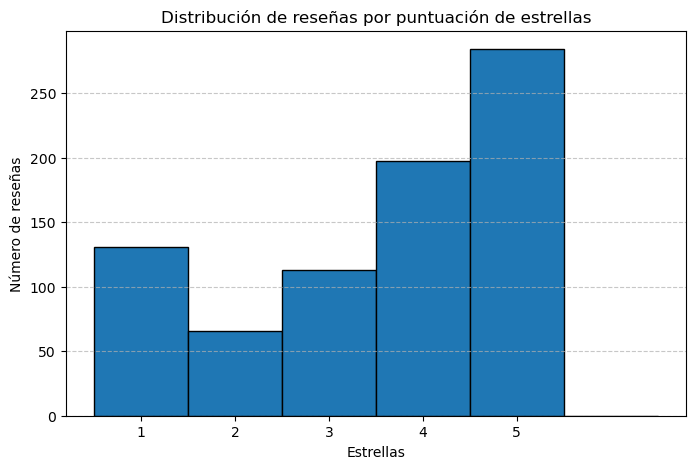

In [236]:
def distribucion_estrellas(y):
    # Crear histograma de la distribución de estrellas
    plt.figure(figsize=(8, 5))
    plt.hist(y, bins=range(1, 8), edgecolor='black', align='left')
    plt.xticks(range(1, 6))  # Ajustar ticks a las puntuaciones de 1 a 5
    plt.xlabel("Estrellas")
    plt.ylabel("Número de reseñas")
    plt.title("Distribución de reseñas por puntuación de estrellas")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    return

distribucion_estrellas(y)

In [237]:
def distancia_predicciones(y, y_pred):
    y = np.array(y)  
    y_pred = np.array(y_pred)

    # Crear índices con espaciado uniforme más grande
    x_indices = np.linspace(0, len(y) * 2.5, len(y))  # Factor 2.5 para mayor separación

    plt.figure(figsize=(12, 6))

    # Graficar la clase real vs la predicha con separación uniforme
    plt.scatter(x_indices, y, color="blue", label="Clase Real", marker="o", s=100)
    plt.scatter(x_indices, y_pred, color="red", label="Clase Predicha", marker="x", s=100)

    # Conectar con líneas para ver las diferencias
    for i in range(len(y)):
        plt.plot([x_indices[i], x_indices[i]], [y[i], y_pred[i]], color="gray", linestyle="--", alpha=0.6)

    plt.xlabel("Índice de Muestra (Separación Uniforme)")
    plt.ylabel("Clase")
    plt.title("Comparación entre Clases Reales y Predichas")
    plt.xticks([])  # Ocultar etiquetas en el eje X para evitar saturación visual
    plt.legend()
    plt.show()



# distancia_predicciones(y_true,y_pred)

In [238]:
import numpy as np
import matplotlib.pyplot as plt

def distancia_predicciones_barras(y, y_pred):
    y = np.array(y)  
    y_pred = np.array(y_pred)
    
    # Calcular la diferencia entre la clase real y la predicha
    diferencia = y - y_pred  

    # Crear etiquetas para cada muestra
    indices = np.arange(len(y))

    plt.figure(figsize=(14, 7))

    # Barras para clase real
    plt.bar(indices, y, color='blue', alpha=0.6, label='Clase Real')

    # Barras para diferencia (positiva o negativa)
    plt.bar(indices, diferencia, color='red', alpha=0.6, label='Diferencia (Real - Predicha)', bottom=y)

    # Agregar valores en las barras
    for i in range(len(y)):
        plt.text(indices[i], y[i] + diferencia[i] / 2, f"{y_pred[i]}", ha='center', va='center', 
                 color="white", fontsize=12, fontweight="bold", bbox=dict(facecolor='black', alpha=0.5, edgecolor='none', pad=2))

    # Expandir los límites del eje Y para evitar cortes
    plt.ylim(0, max(y) + 2)

    plt.xlabel("Índice de Muestra")
    plt.ylabel("Clase")
    plt.title("Diferencia entre Clases Reales y Predichas")
    plt.xticks(indices)  # Mostrar cada índice
    plt.yticks(range(1, max(y) + 2))  # Ajustar para las clases
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.show()

# Ejemplo de uso con datos de prueba
y_true = np.array([5, 4, 3, 5, 2, 1, 4, 3, 5, 2])
y_pred = np.array([5, 3, 3, 4, 2, 1, 4, 2, 5, 3])

# distancia_predicciones_barras(y_true, y_pred)

# **ENTRENAMIENTO DEL MODELO**

Datos balanceados con sobremuestreo:
stars
1    284
2    284
3    284
4    284
5    284
Name: count, dtype: int64


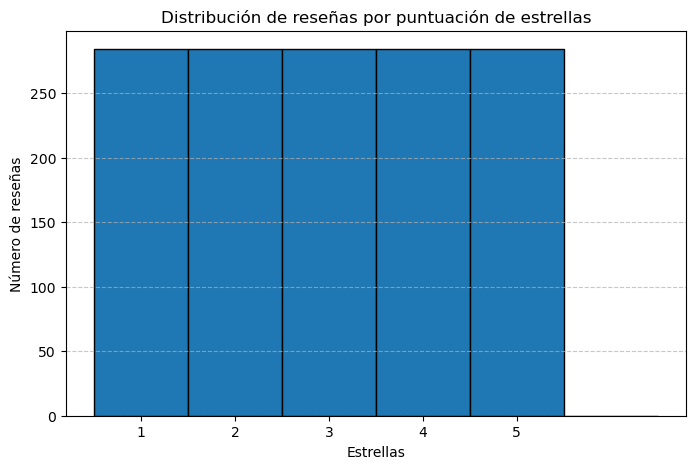

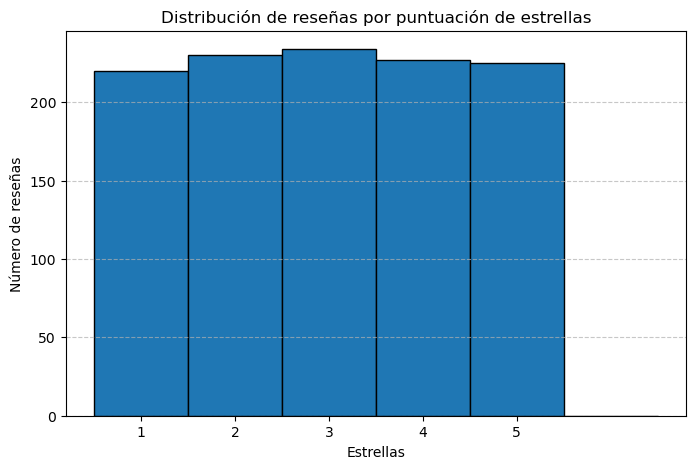

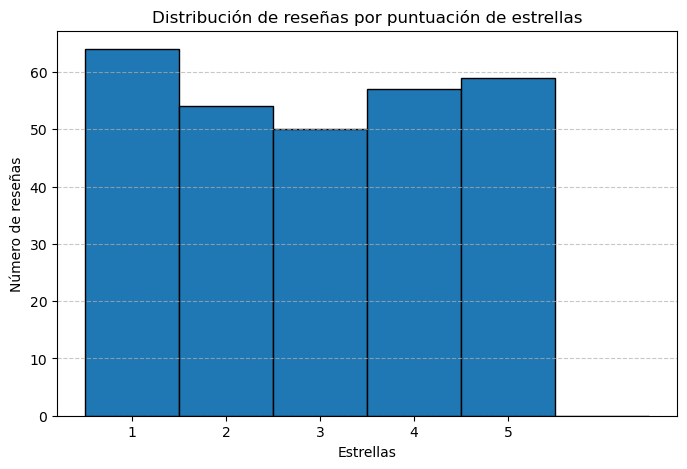

El accuracy del clasificador  Naive-Bayes  es:  76.06
              precision    recall  f1-score   support

           1       0.84      0.81      0.83        64
           2       0.76      0.93      0.83        54
           3       0.67      0.78      0.72        50
           4       0.73      0.58      0.65        57
           5       0.79      0.71      0.75        59

    accuracy                           0.76       284
   macro avg       0.76      0.76      0.76       284
weighted avg       0.76      0.76      0.76       284



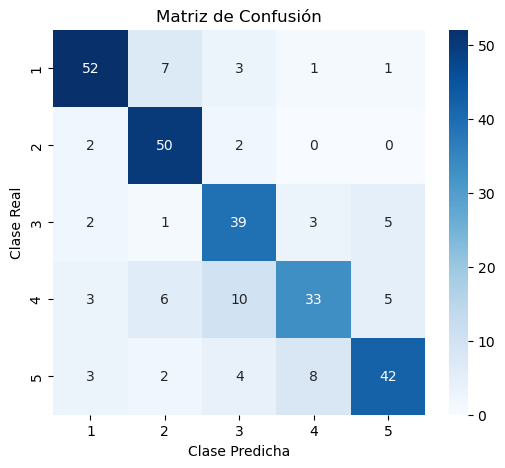

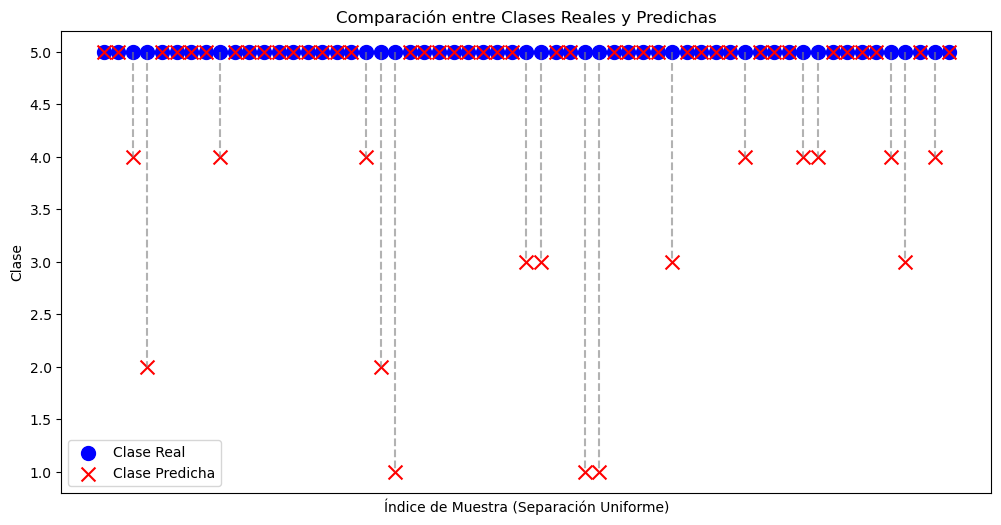

El accuracy del clasificador  LogisticRegression  es:  78.87
              precision    recall  f1-score   support

           1       0.83      0.92      0.87        64
           2       0.94      0.93      0.93        54
           3       0.70      0.78      0.74        50
           4       0.75      0.58      0.65        57
           5       0.72      0.73      0.72        59

    accuracy                           0.79       284
   macro avg       0.79      0.79      0.78       284
weighted avg       0.79      0.79      0.79       284



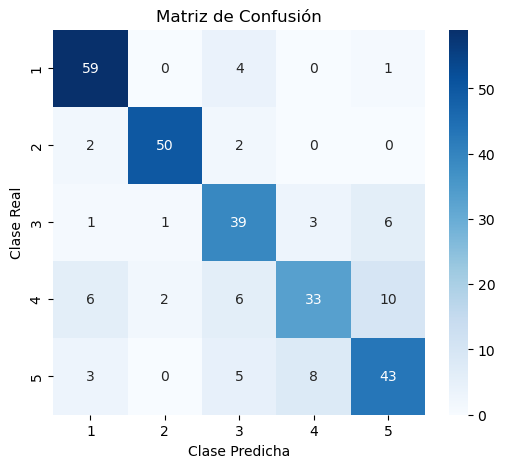

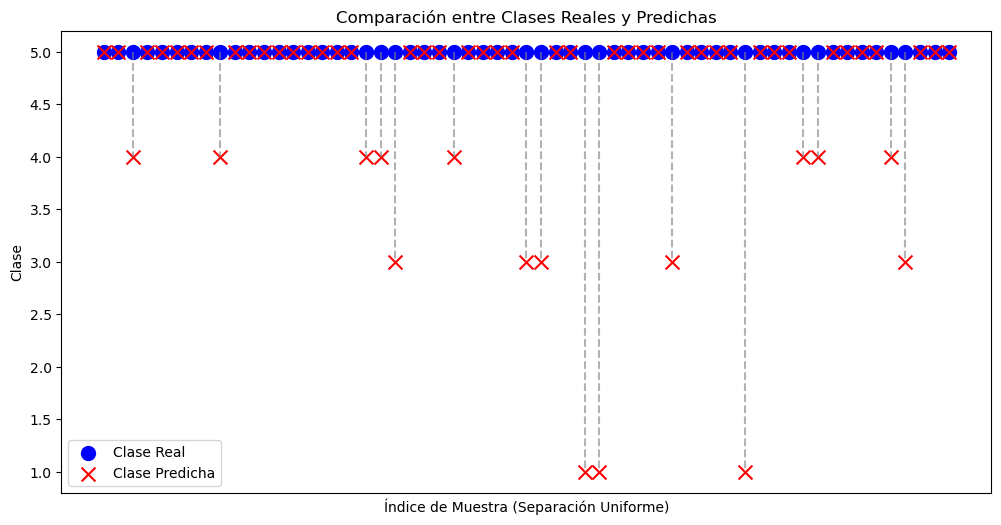

El accuracy del clasificador  RedNeuronal  es:  79.93
              precision    recall  f1-score   support

           1       0.84      0.95      0.89        64
           2       0.96      1.00      0.98        54
           3       0.83      0.78      0.80        50
           4       0.65      0.58      0.61        57
           5       0.70      0.68      0.69        59

    accuracy                           0.80       284
   macro avg       0.80      0.80      0.80       284
weighted avg       0.79      0.80      0.79       284



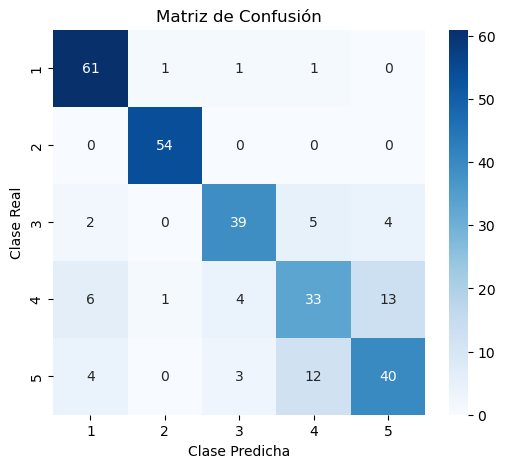

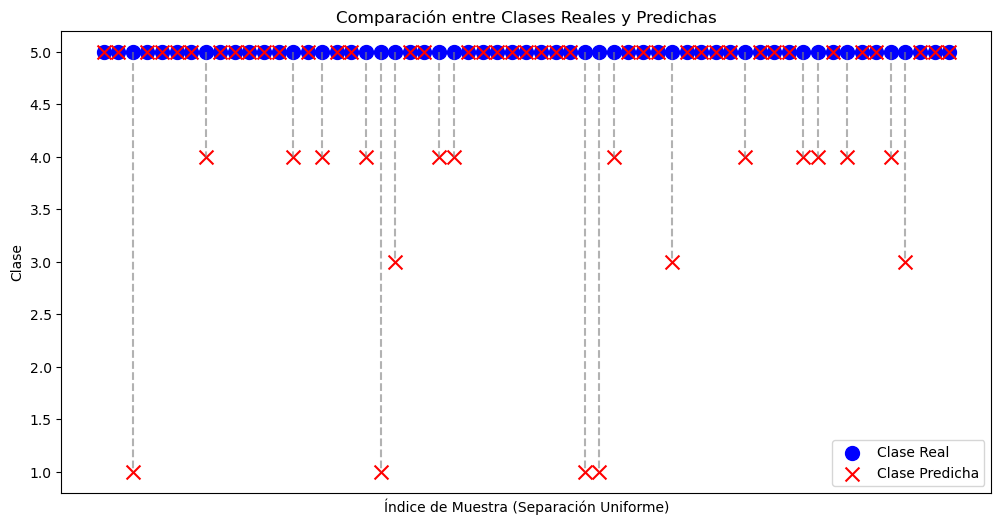

In [239]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

# Opción 1: Submuestreo (reduce la cantidad de datos de la clase mayoritaria)
# undersampler = RandomUnderSampler(random_state=12)
# X, y = undersampler.fit_resample(X, y)
# print("Datos balanceados con submuestreo:")
# print(y.value_counts())

# Opción 2: Sobremuestreo (aumenta la cantidad de datos de la clase minoritaria)
oversampler = RandomOverSampler(random_state=12)
X, y = oversampler.fit_resample(X, y)
print("Datos balanceados con sobremuestreo:")
print(y.value_counts())

distribucion_estrellas(y)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=12)
distribucion_estrellas(Y_train)
distribucion_estrellas(Y_test)

# Calcular el peso inverso de cada clase
class_counts = np.bincount(Y_train)  # Frecuencia de cada clase
class_prior = class_counts / np.sum(class_counts)  # Probabilidad de cada clase
class_prior=class_prior[1:]
def entrenar_modelo(XTrain,XTest,YTrain,YTest):
    clasificadores = [
        MultinomialNB(alpha = 2,class_prior=class_prior),
        LogisticRegression(random_state=12,class_weight="balanced", C = 1),
        MLPClassifier(hidden_layer_sizes=(50,), solver='adam', max_iter=300, random_state=42)
        # SVC(random_state = 12),
        # DecisionTreeClassifier(criterion='entropy', random_state=12),  # Árbol de decisión base
        # BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy', random_state=12),
        #                  n_estimators=15, random_state=12),  # Bagging
        # AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy', random_state=12),
        #                    n_estimators=15, random_state=12,algorithm = 'SAMME'),  # Boosting
        # RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=12)  # Random Forest
    ]
    
    nombres = ['Naive-Bayes','LogisticRegression','RedNeuronal']
    lista_acc = []
    for i, clasificador in enumerate(clasificadores):
        clasificador.fit(XTrain, YTrain)
        y_test_pred = clasificador.predict(XTest)
        #Evaluar modelo
        acc = round(accuracy_score(YTest, y_test_pred)*100,2)
        lista_acc.append(acc)
        print("El accuracy del clasificador ",nombres[i]," es: ",acc)
        print(classification_report(YTest, y_test_pred))
        matriz_confusion(YTest,y_test_pred)
        mascara = YTest==5
        ytest_5 = YTest[mascara]
        y_pred_5 = y_test_pred[mascara]
        distancia_predicciones(ytest_5,y_pred_5)
    return max(lista_acc)
acc = entrenar_modelo(X_train, X_test, Y_train, Y_test)
#acc = entrenar_modelo(X_val,X_test,Y_val,Y_test)

In [240]:

# # Entrenar modelo de Regresión Logística
# modelo_lr = LogisticRegression(random_state=12, class_weight="balanced", C=1, max_iter=1000)
# modelo_lr.fit(X_train, Y_train)

# # Obtener coeficientes de importancia
# coeficientes = modelo_lr.coef_  # (n_clases, n_palabras)

# # Obtener vocabulario
# vocabulario = vectorizer.get_feature_names_out()

# # Mostrar las palabras más influyentes por clase
# for i, estrellas in enumerate(modelo_lr.classes_):
#     top_indices = np.argsort(coeficientes[i])[-15:]  # Tomamos las 15 palabras más importantes
#     palabras_top = [vocabulario[idx] for idx in top_indices]
#     coef_top = [coeficientes[i, idx] for idx in top_indices]

#     print(f"\n🔹 Palabras más influyentes para {estrellas} estrellas:")
#     for palabra, coef in zip(palabras_top, coef_top):
#         print(f"{palabra} (score: {coef:.4f})")


In [241]:

# # Entrenar modelo de Regresión Logística
# modelo_lr = LogisticRegression(random_state=12, class_weight="balanced", C=1, max_iter=1000)
# modelo_lr.fit(X_train, Y_train)

# # Obtener coeficientes de importancia
# coeficientes = modelo_lr.coef_  # (n_clases, n_palabras)

# # Obtener vocabulario
# vocabulario = vectorizer.get_feature_names_out()

# # Inicializar una lista para guardar los porcentajes
# porcentajes_por_clase = []

# # Calcular los porcentajes de cada palabra para cada clase
# for i, estrellas in enumerate(modelo_lr.classes_):
#     coef_class = coeficientes[i]
#     total_coef = np.sum(np.abs(coef_class))  # Sumamos los coeficientes absolutos de la clase
#     porcentajes = (np.abs(coef_class) / total_coef) * 100  # Convertimos en porcentaje
    
#     # Guardamos los porcentajes junto con las palabras
#     top_indices = np.argsort(coef_class)[-15:]  # Tomamos las 15 palabras más importantes
#     palabras_top = [vocabulario[idx] for idx in top_indices]
#     porcentajes_top = [porcentajes[idx] for idx in top_indices]
    
#     porcentajes_por_clase.append((palabras_top, porcentajes_top))

# # Crear una cuadrícula de subgráficas (3 filas, 2 columnas)
# fig, axes = plt.subplots(3, 2, figsize=(12, 10))  # Tamaño reducido
# axes = axes.flatten()

# # Crear un gráfico por clase de estrellas
# for i, (palabras_top, porcentajes_top) in enumerate(porcentajes_por_clase):
#     ax = axes[i]  # Acceder a cada subgráfico
#     ax.barh(palabras_top, porcentajes_top, color='skyblue')
#     ax.set_title(f'Porcentajes de palabras para {modelo_lr.classes_[i]} estrellas')
#     ax.set_xlabel('Porcentaje')
#     ax.set_ylabel('Palabras')

# # Ajustar el diseño para evitar solapamientos
# plt.tight_layout()
# plt.show()

In [242]:
# lista_acc = []

# def limpiar_texto(texto):
#     return texto.lower()

# for i in range(10,20):

#     data = pd.read_csv("reviews_cascos_gaming.csv",sep=';', encoding="utf-8")

#     top = i

#     # Cargar datos
#     reseñas = data['review'].astype(str).fillna("").apply(limpiar_texto)

#     # Vectorización con BoW
#     vectorizer = CountVectorizer()
#     X = reseñas
#     y = data['stars']

#     # Dividir en entrenamiento, validación y prueba
#     X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, y, test_size=0.2, random_state=12)
#     X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.5, random_state=12)

#     X_train = vectorizer.fit_transform(X_train)

#     # Entrenar el modelo de Regresión Logística
#     modelo_lr = LogisticRegression(random_state=12, class_weight="balanced", C=1, max_iter=1000)
#     modelo_lr.fit(X_train, Y_train)

#     # Obtener coeficientes de importancia
#     coeficientes = np.abs(modelo_lr.coef_).mean(axis=0)  # Promedio de coeficientes en todas las clases

#     # Obtener vocabulario
#     vocabulario = np.array(vectorizer.get_feature_names_out())

#     # Seleccionar las Top N palabras con más peso en el modelo
#     top_indices = np.argsort(coeficientes)[-top:]  # Índices de las palabras más influyentes
#     palabras_clave = set(vocabulario[top_indices])  # Convertir a conjunto para búsqueda rápida


#     # Aplicar la función a las reseñas de validación
#     # reseñas_val = data.loc[X_val.indices, 'review'].astype(str).fillna("")
#     X_val = X_val.apply(lambda x: filtrar_reseña(x, palabras_clave))

#     # data.loc[X_val.indices, 'review_filtrada'] = reseñas_filtradas


#     X_val = vectorizer.transform(X_val)
#     X_test = vectorizer.transform(X_test)

#     lista_acc.append(entrenar_modelo(X_val,X_test,Y_val,Y_test))

# # Graficar los resultados
# plt.plot(range(10, 20), lista_acc, marker='o')
# plt.xlabel('Top N palabras')
# plt.ylabel('Accuracy (%)')
# plt.title('Impacto del número de palabras clave en el modelo')
# plt.xticks(range(10, 20))
# plt.grid(True)
# plt.show()


In [243]:
# def limpiar_texto(texto):
#     return texto#.lower()

# data = pd.read_csv("reviews_cascos_gaming.csv",sep=';', encoding="utf-8")

# # Cargar datos
# reseñas = data['review'].astype(str).fillna("").apply(limpiar_texto)

# # Vectorización con BoW
# vectorizer = CountVectorizer()
# X = reseñas
# y = data['stars']

# # Dividir en entrenamiento, validación y prueba
# X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# X_train = vectorizer.fit_transform(X_train)
# X_test = vectorizer.transform(X_test)

# entrenar_modelo(X_train,X_test,Y_train,Y_test)